# JCAMP-DX to mass spec fragmentation pattern

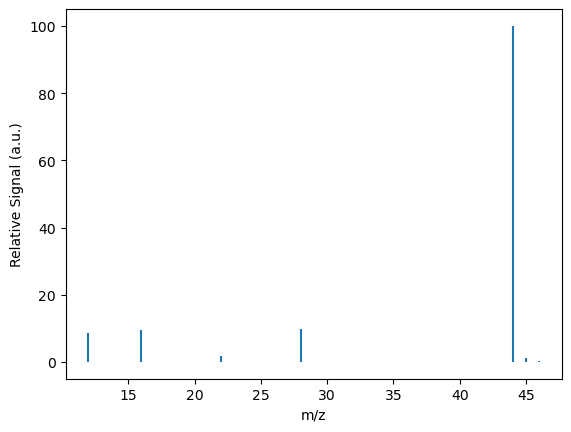

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "124-38-9-Mass.jdx"
filename_out = filename.replace('.jdx','')

frag_flag = 0
comm_flag = 1

mz = []
mzother = []

with open(filename) as file:
    for line in file:
        if '##TITLE' in line:
            name = line.replace('##TITLE=','')
            name = name.replace('\n','')
        if '##' in line:
            frag_flag=0
        if frag_flag == 1:
            mz=mz+line.split()
        if 'PEAK TABLE' in line:
            frag_flag=1

mz_array = np.zeros([len(mz),2])

for i,val in enumerate(mz):
    mz_array[i] = val.split(",")
    
mz_array[:,1] = mz_array[:,1]/mz_array[:,1].max()*100 

df = pd.DataFrame(mz_array,columns=['m/z','rel signal'])

filename_out = 'frag_' + name + '_' + filename_out + '.csv'

df.to_csv(filename_out)
    
plt.vlines(mz_array[:,0],mz_array[:,1],ymax=0)
plt.xlabel('m/z')
plt.ylabel('Relative Signal (a.u.)')

plt.show()

In [7]:
name

'Carbon dioxide'

In [ ]:
##TITLE=Methyl Alcohol